<a href="https://colab.research.google.com/github/VidhyaSri10/CodeAlpha_TODOLIST/blob/main/Food_and_Nutrition_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder

file_path = pd.read_csv("/content/nutrition.csv")

In [ ]:
#Load the dataset
nutrition_df = pd.read_csv("/content/nutrition.csv")
nutrition_df.head()


,s.no,name,serving_size,calories,total_fat,cholesterol,sodium,vitamin_b12,vitamin_c,vitamin_k,...,iron,protein,carbohydrate,fiber,sugars,fructose,glucose,sucrose,alcohol,water
0,0,Cornstarch,100 g,381,0.1g,0,9.00 mg,0.00 mcg,0.0 mg,0.0 mcg,...,0.47 mg,0.26 g,91.27 g,0.9 g,0.00 g,0,0,0,0.0 g,8.32 g
1,1,"Nuts, pecans",100 g,691,72g,0,0.00 mg,0.00 mcg,1.1 mg,3.5 mcg,...,2.53 mg,9.17 g,13.86 g,9.6 g,3.97 g,0.04 g,0.04 g,3.90 g,0.0 g,3.52 g
2,2,"Eggplant, raw",100 g,25,0.2g,0,2.00 mg,0.00 mcg,2.2 mg,3.5 mcg,...,0.23 mg,0.98 g,5.88 g,3.0 g,3.53 g,1.54 g,1.58 g,0.26 g,0.0 g,92.30 g
3,3,"Teff, uncooked",100 g,367,2.4g,0,12.00 mg,0,0,1.9 mcg,...,7.63 mg,13.30 g,73.13 g,8.0 g,1.84 g,0.47 g,0.73 g,0.62 g,0,8.82 g
4,4,"Sherbet, orange",100 g,144,2g,1mg,46.00 mg,0.13 mcg,2.3 mg,0.0 mcg,...,0.14 mg,1.10 g,30.40 g,1.3 g,24.32 g,0,0,0,0.0 g,66.10 g


In [ ]:
# Function to clean and convert columns to numeric
def clean_and_convert(value):
    if pd.isna(value):
        return None
    if isinstance(value, (int, float)):
        return value
    value = re.sub(r'[^\d\.-]', '', str(value))
    return float(value) if value else None

# Identify columns to convert (excluding text-based columns)
columns_to_convert = [col for col in nutrition_df.columns if col not in ['name', 'serving_size']]

# Apply cleaning function
for col in columns_to_convert:
    nutrition_df[col] = nutrition_df[col].apply(clean_and_convert)

print(nutrition_df)


      s.no                                               name serving_size  \
0        0                                         Cornstarch        100 g   
1        1                                       Nuts, pecans        100 g   
2        2                                      Eggplant, raw        100 g   
3        3                                     Teff, uncooked        100 g   
4        4                                    Sherbet, orange        100 g   
...    ...                                                ...          ...   
8784  8784  Beef, raw, all grades, trimmed to 0" fat, sepa...        100 g   
8785  8785  Lamb, cooked, separable lean only, composite o...        100 g   
8786  8786  Lamb, raw, separable lean and fat, composite o...        100 g   
8787  8787  Beef, raw, all grades, trimmed to 0" fat, sepa...        100 g   
8788  8788  Beef, raw, all grades, trimmed to 0" fat, sepa...        100 g   

      calories  total_fat  cholesterol  sodium  vitamin_b12  vi

In [ ]:
#Handling Missing values and Outliers
#list of column names to select multiple columns
columns_to_fill = ['calories', 'cholesterol','sodium', 'vitamin_b12',
                    'vitamin_c', 'vitamin_k', 'calcium', 'iron', 'protein',
                    'carbohydrate', 'fiber', 'sugars', 'fructose',
                    'glucose', 'sucrose', 'alcohol', 'water']

# Calculate the mode for each column individually and store in a dictionary
mode_values = {}
for col in columns_to_fill:
    mode_values[col] = nutrition_df[col].mode()[0]  # Get the first mode value

# Fill missing values in each column using the calculated mode
for col, mode_val in mode_values.items():
    nutrition_df[col] = nutrition_df[col].fillna(mode_val)

print(nutrition_df)

nutrition_df.isnull().sum()

      s.no                                               name serving_size  \
0        0                                         Cornstarch        100 g   
1        1                                       Nuts, pecans        100 g   
2        2                                      Eggplant, raw        100 g   
3        3                                     Teff, uncooked        100 g   
4        4                                    Sherbet, orange        100 g   
...    ...                                                ...          ...   
8784  8784  Beef, raw, all grades, trimmed to 0" fat, sepa...        100 g   
8785  8785  Lamb, cooked, separable lean only, composite o...        100 g   
8786  8786  Lamb, raw, separable lean and fat, composite o...        100 g   
8787  8787  Beef, raw, all grades, trimmed to 0" fat, sepa...        100 g   
8788  8788  Beef, raw, all grades, trimmed to 0" fat, sepa...        100 g   

      calories  total_fat  cholesterol  sodium  vitamin_b12  vi

,0
s.no,0
name,0
serving_size,0
calories,0
total_fat,0
cholesterol,0
sodium,0
vitamin_b12,0
vitamin_c,0
vitamin_k,0


In [ ]:
#Descriptive Statistics
print("\nSummary Statistics:")
print(nutrition_df.describe())


Summary Statistics:
              s.no     calories    total_fat  cholesterol        sodium  \
count  8789.000000  8789.000000  8789.000000  8789.000000   8789.000000   
mean   4394.000000   226.283878    10.556855    38.723063    306.353851   
std    2537.310091   169.862001    15.818247   117.358944    939.220468   
min       0.000000     0.000000     0.000000     0.000000      0.000000   
25%    2197.000000    91.000000     1.000000     0.000000     36.000000   
50%    4394.000000   191.000000     5.100000     2.000000     84.000000   
75%    6591.000000   337.000000    14.000000    65.000000    396.000000   
max    8788.000000   902.000000   100.000000  3100.000000  38758.000000   

       vitamin_b12    vitamin_c    vitamin_k      calcium         iron  \
count  8789.000000  8789.000000  8789.000000  8789.000000  8789.000000   
mean      1.201716     8.356548     9.296268    73.317328     2.645764   
std       4.271908    65.624854    62.128752   199.850425     5.661046   
min    

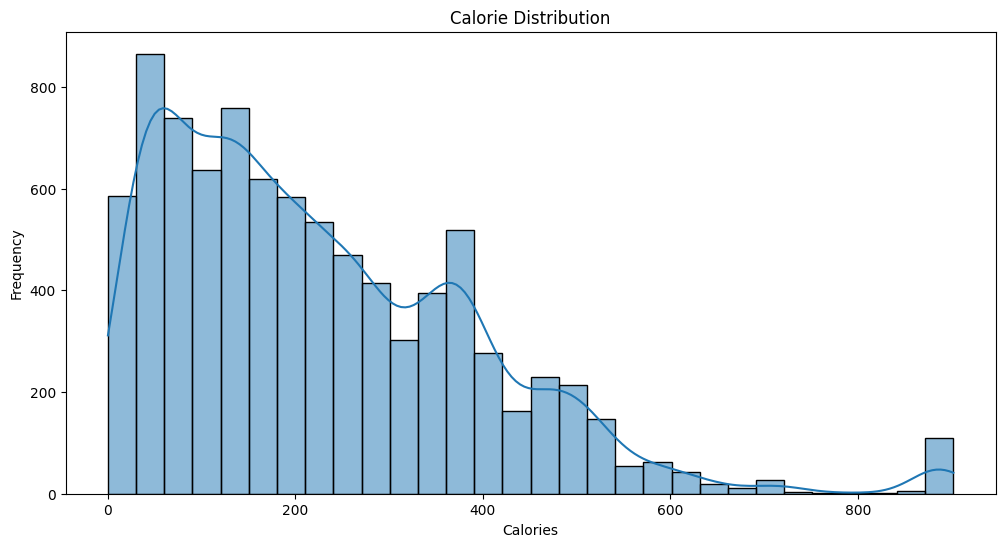

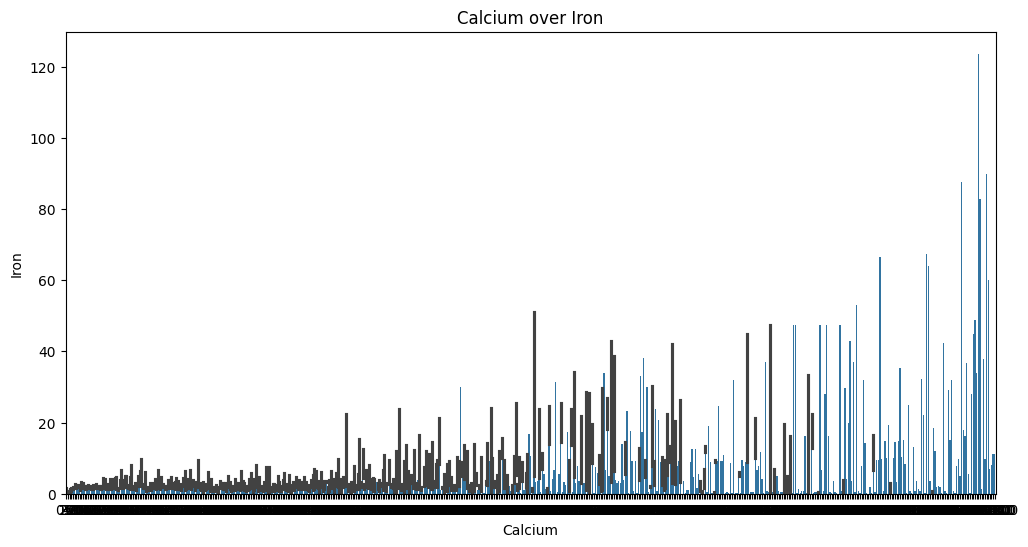

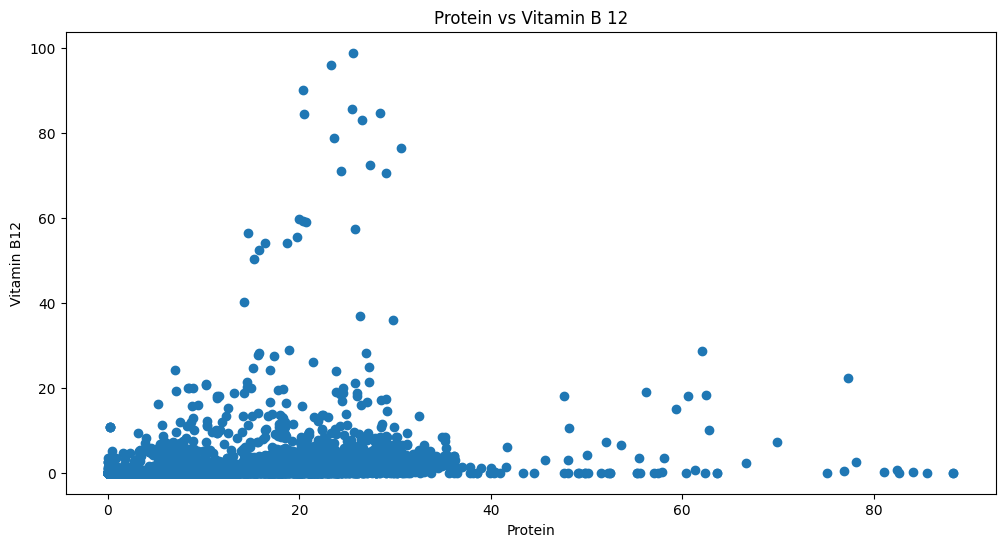

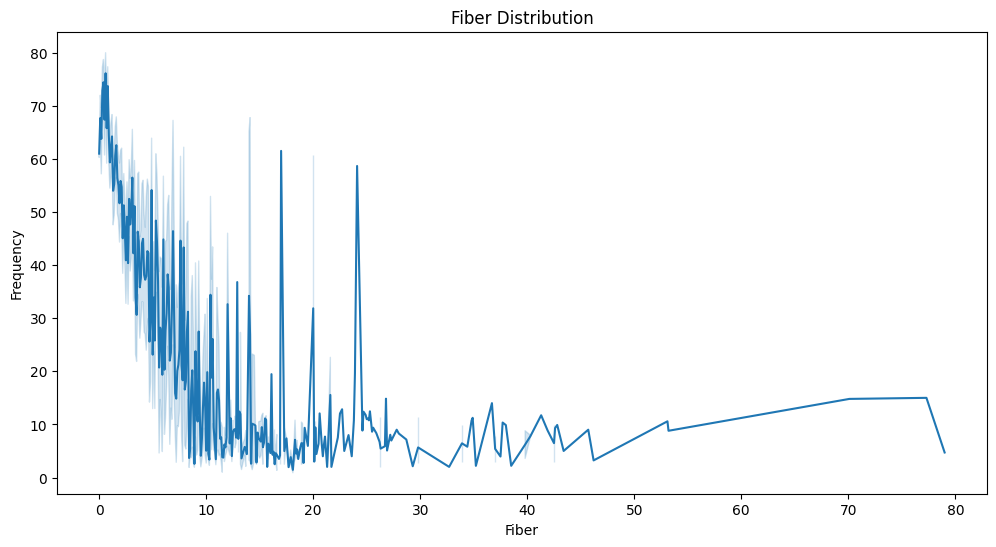

In [ ]:
#Data Visualization
# Plot distributions of key variables
plt.figure(figsize=(12, 6))
sns.histplot(nutrition_df['calories'], kde=True, bins=30)
plt.title('Calorie Distribution')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x = nutrition_df['calcium'], y = nutrition_df['iron'])
plt.title('Calcium over Iron')
plt.xlabel('Calcium')
plt.ylabel('Iron')
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(nutrition_df['protein'], nutrition_df['vitamin_b12'])
plt.title('Protein vs Vitamin B 12')
plt.xlabel('Protein')
plt.ylabel('Vitamin B12')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x = nutrition_df['fiber'], y = nutrition_df['water'])
plt.title('Fiber Distribution')
plt.xlabel('Fiber')
plt.ylabel('Frequency')
plt.show()



In [ ]:
top_protein_foods = nutrition_df.sort_values(by='protein', ascending=False).head(5)
print("\nTop 5 High-Protein Foods:")
print(top_protein_foods[['name', 'protein', 'calories', 'water', 'sucrose',
                          'alcohol']])


Top 5 High-Protein Foods:
                                                   name  protein  calories  \
213                                 Soy protein isolate    88.32       335   
1378                Soy protein isolate, potassium type    88.32       321   
1618                  Gelatins, unsweetened, dry powder    85.60       335   
3893     Egg, glucose reduced, stabilized, dried, white    84.08       357   
4401  Seal, dried (Alaska Native), meat, bearded (Oo...    82.60       351   

      water  sucrose  alcohol  
213    4.98      0.0      0.0  
1378   4.98      0.0      0.0  
1618  13.00      0.0      0.0  
3893   5.48      0.0      0.0  
4401  11.60      0.0      0.0  


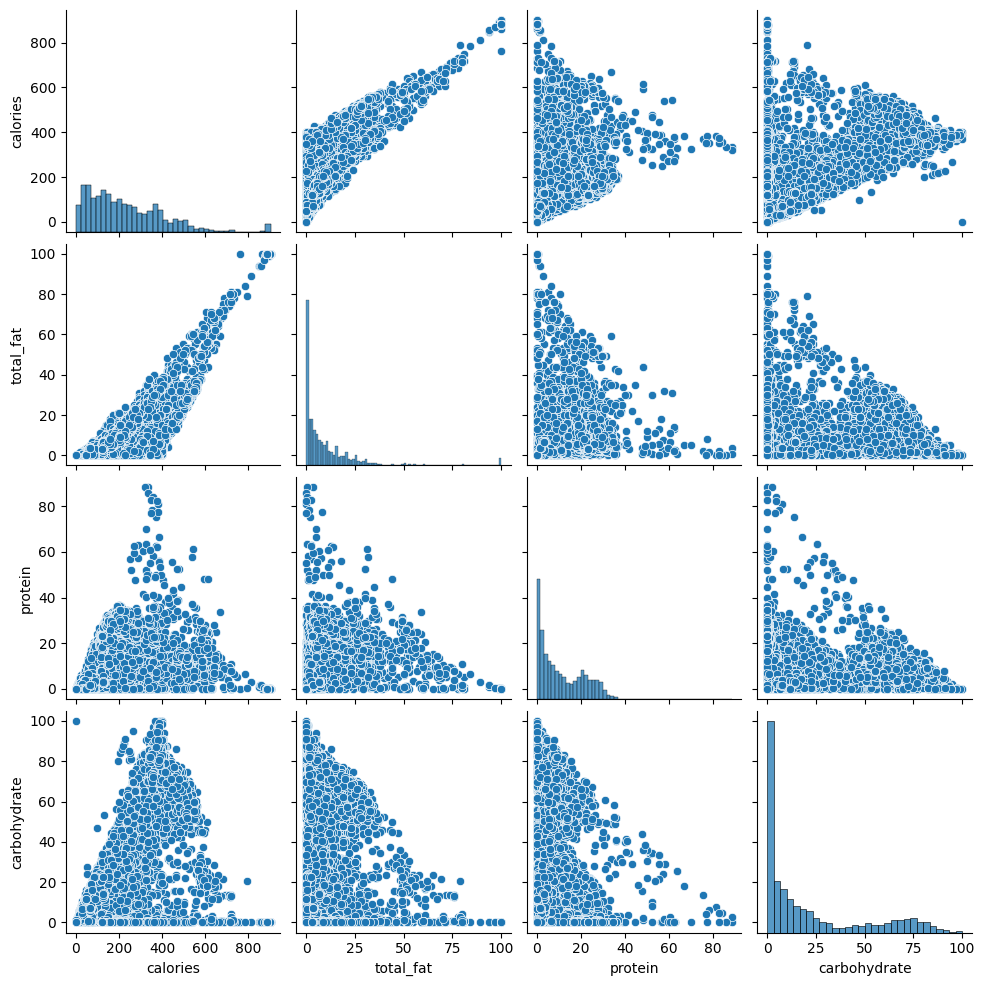

In [ ]:
#pairplot
sns.pairplot(nutrition_df[['calories', 'total_fat', 'protein', 'carbohydrate']])
plt.show()

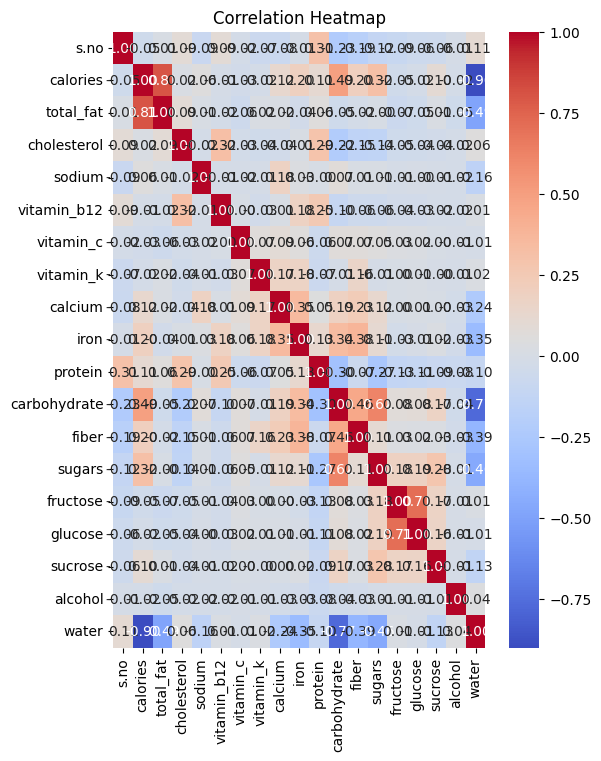

In [ ]:
# Correlation heatmap
plt.figure(figsize=(6,8))
# Select only numeric columns for correlation calculation
numeric_df = nutrition_df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

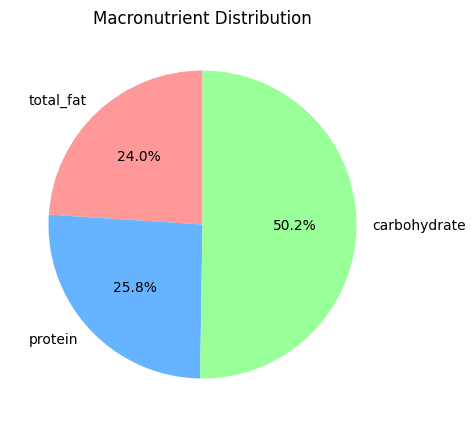

In [ ]:
#Pie Chart
# 1. Macronutrient Distribution Pie Chart
macronutrients = ['total_fat', 'protein', 'carbohydrate']
macronutrient_sums = nutrition_df[macronutrients].sum()

plt.figure(figsize=(5,5))
plt.pie(macronutrient_sums, labels=macronutrients, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Macronutrient Distribution')
plt.show()

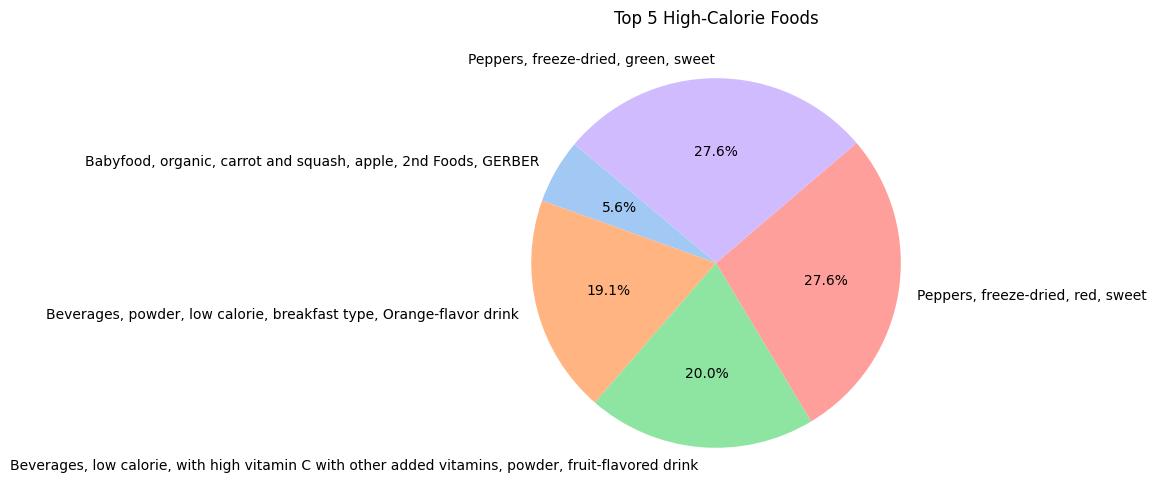

In [ ]:
# 2. Pie Chart on top 5 high calorie food
top_5_calories = nutrition_df.nlargest(5, 'vitamin_c')

plt.figure(figsize=(6,6))
plt.pie(top_5_calories['calories'], labels=top_5_calories['name'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Top 5 High-Calorie Foods')
plt.show()

In [ ]:
#Applying Label Encoder
le_name = LabelEncoder()
le_serving = LabelEncoder()

nutrition_df['name_encoded'] = le_name.fit_transform(nutrition_df['name'])
nutrition_df['serving_size_encoded'] = le_serving.fit_transform(nutrition_df['serving_size'])

# Display the updated DataFrame with encoded columns
print("\nUpdated DataFrame with Encoded Columns:")
print(nutrition_df.head())

# Step 2: Display Encoding Mapping for reference
print("\nLabel Encoding Mapping (Name):")
print(dict(zip(le_name.classes_, le_name.transform(le_name.classes_))))

print("\nLabel Encoding Mapping (Serving Size):")
print(dict(zip(le_serving.classes_, le_serving.transform(le_serving.classes_))))


Updated DataFrame with Encoded Columns:
   s.no             name serving_size  calories  total_fat  cholesterol  \
0     0       Cornstarch        100 g       381        0.1          0.0   
1     1     Nuts, pecans        100 g       691       72.0          0.0   
2     2    Eggplant, raw        100 g        25        0.2          0.0   
3     3   Teff, uncooked        100 g       367        2.4          0.0   
4     4  Sherbet, orange        100 g       144        2.0          1.0   

   sodium  vitamin_b12  vitamin_c  vitamin_k  ...  carbohydrate  fiber  \
0     9.0         0.00        0.0        0.0  ...         91.27    0.9   
1     0.0         0.00        1.1        3.5  ...         13.86    9.6   
2     2.0         0.00        2.2        3.5  ...          5.88    3.0   
3    12.0         0.00        0.0        1.9  ...         73.13    8.0   
4    46.0         0.13        2.3        0.0  ...         30.40    1.3   

   sugars  fructose  glucose  sucrose  alcohol  water  name_enc